### Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [138]:
df = pd.read_excel('Airlines+Data (1).xlsx', index_col='Month', parse_dates=['Month'])
df.head(),df.tail()

(            Passengers
 Month                 
 1995-01-01         112
 1995-02-01         118
 1995-03-01         132
 1995-04-01         129
 1995-05-01         121,
             Passengers
 Month                 
 2002-08-01         405
 2002-09-01         355
 2002-10-01         306
 2002-11-01         271
 2002-12-01         306)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [5]:
len(df)

96

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.columns

Index(['Passengers'], dtype='object')

In [8]:
df.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [182]:
# create a pivot table with year as the index and month as the columns and passengers as the values
df_pivot = df.pivot_table(values='Passengers', index=df.index.year, columns=df.index.month)
df_pivot

Month,1,2,3,4,5,6,7,8,9,10,11,12
Month,,,,,,,,,,,,
1995,112,118,132,129,121,135,148,148,136,119,104,118
1996,115,126,141,135,125,149,170,170,158,133,114,140
1997,145,150,178,163,172,178,199,199,184,162,146,166
1998,171,180,193,181,183,218,230,242,209,191,172,194
1999,196,196,236,235,229,243,264,272,237,211,180,201
2000,204,188,235,227,234,264,302,293,259,229,203,229
2001,242,233,267,269,270,315,364,347,312,274,237,278
2002,284,277,317,313,318,374,413,405,355,306,271,306


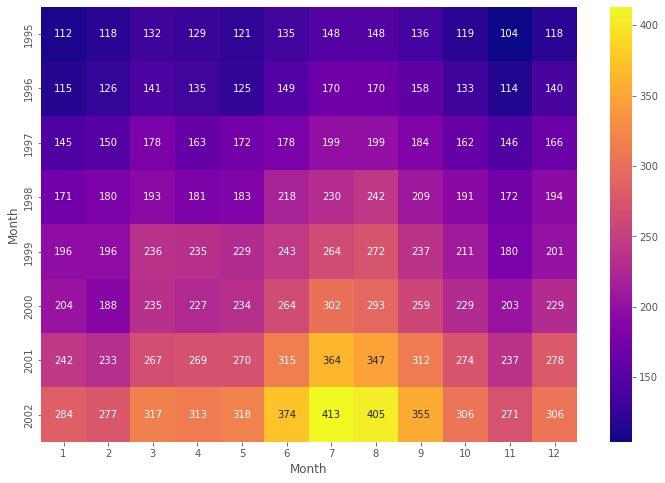

In [183]:
# visualize the pivot table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=True, cmap='plasma', fmt='g');

## <font color='purple'><b>Line Plot :

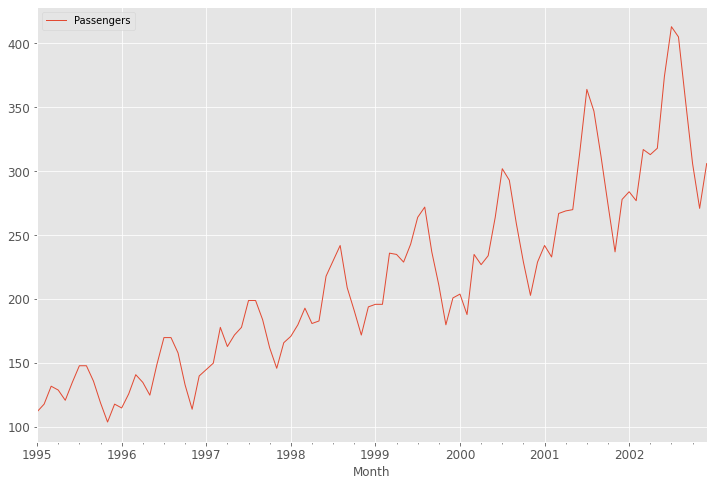

In [9]:
df.plot(figsize=(12,8), linewidth=1, fontsize=12);

<font color='maroon'><b><I>The time series plot has increasing secular trend and there are seasonal patterns seen.
<font color='maroon'><b><I>For the time series forecasting the data has to be stationary for which the statistical properties are more or less same over time, like
    
<font color='maroon'><b> 1) Constant Mean

<font color='maroon'><b>2) Constant Variance
     
<font color='maroon'><b>3) No Seasonality

### <font color='orange'><b><I>Function to test stationarity :

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    airpass_test = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(airpass_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in airpass_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

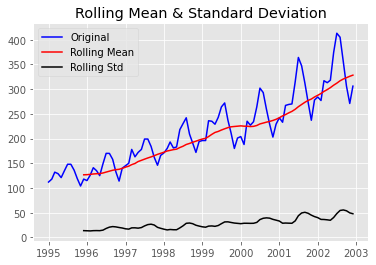

Results of Dickey Fuller Test:
Test Statistic                  1.340248
p-value                         0.996825
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [12]:
test_stationarity(df)

<font color='maroon'><b><I>Since p value is more than 0.5 the time series is not stationary and from above plot, we can see that Rolling Mean itself has a trend component even though Rolling Standard Deviation is fairly constant with time.

<font color='maroon'><b><I>For time series to be stationary, we need to ensure that both Rolling Mean and Rolling Standard Deviation remain fairly constant WRT time.Both the curves needs to be parallel to x axis.

## <font color='purple'><b>Log Transformation :

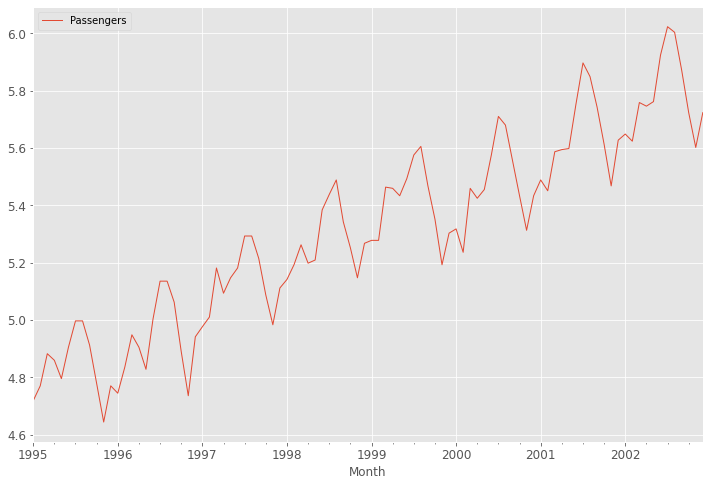

In [13]:
df_log = df.copy()
df_log = np.log(df)
df_log.plot(figsize=(12,8), linewidth=1, fontsize=12);

<font color='maroon'><b><I>Now the exponentiality in the curve has been removed.

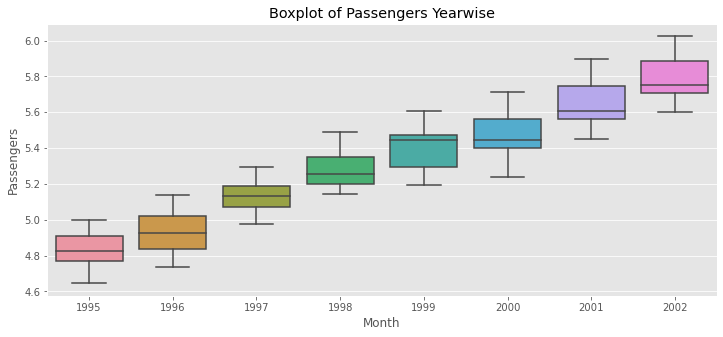

In [65]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_log, x=df_log.index.year,y='Passengers')
plt.title('Boxplot of Passengers Yearwise');

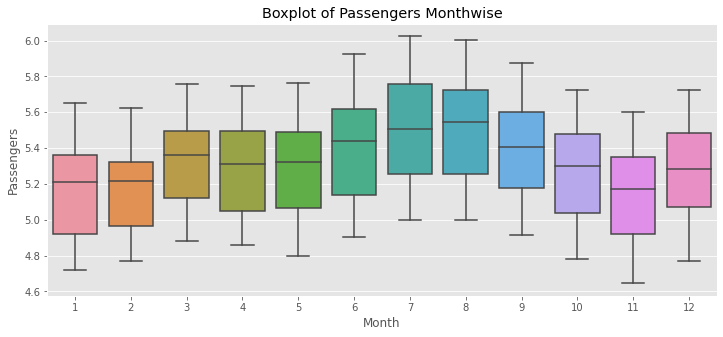

In [67]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_log, x=df_log.index.month, y='Passengers')
plt.title('Boxplot of Passengers Monthwise');

## <font color='purple'><b>Moving Average :

In [14]:
rollmean_log = df_log.rolling(window=12).mean()
rollstd_log = df_log.rolling(window=12).std()

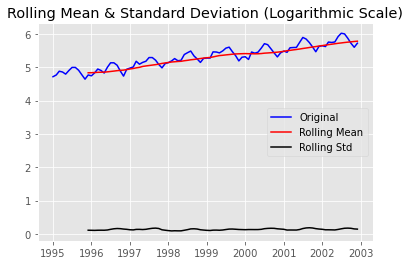

In [15]:
plt.plot(df_log, color='blue', label='Original')
plt.plot(rollmean_log, color='red', label='Rolling Mean')
plt.plot(rollstd_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)');

## <font color='purple'><b>Differencing :

In [17]:
df_new = df_log - rollmean_log

In [18]:
df_new.dropna(inplace=True)
df_new.head()

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142


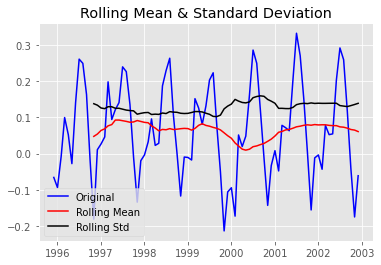

Results of Dickey Fuller Test:
Test Statistic                 -1.910930
p-value                         0.326937
#Lags Used                     12.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


In [19]:
test_stationarity(df_new)

### <font color='hotpink'><b><I>Time Shift Transformation :

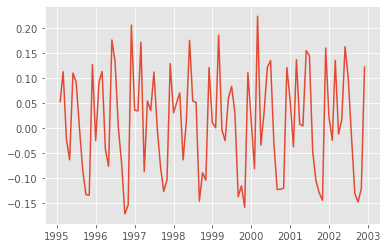

In [20]:
df_log_diff = df_log - df_log.shift()
plt.plot(df_log_diff);

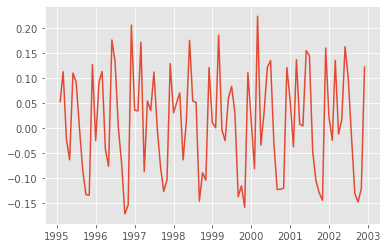

In [21]:
df_log_diff.dropna(inplace=True)
plt.plot(df_log_diff);

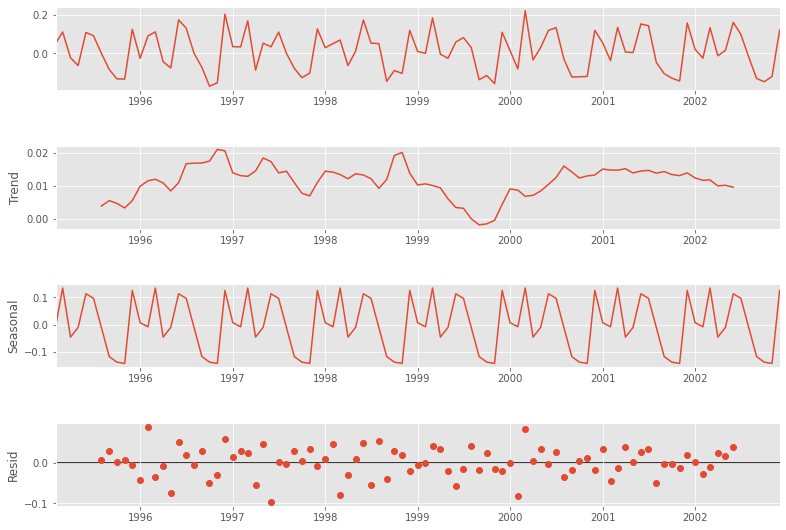

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

seas_add = seasonal_decompose(df_log_diff, model='additive')
seas_add.plot()
plt.gcf().set_size_inches(12, 8);

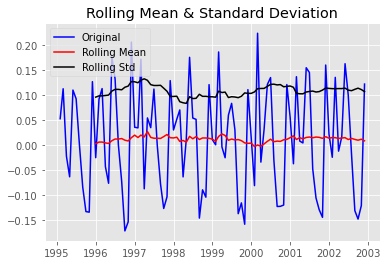

Results of Dickey Fuller Test:
Test Statistic                 -2.670823
p-value                         0.079225
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [22]:
test_stationarity(df_log_diff)

<font color='maroon'><b><I>From the graph, now there is no seasonality and there is constant variance and constant mean.
    
<font color='maroon'><b><I>Now the pvalue is less than 0.5 and also the critical values are close to the test statistic.

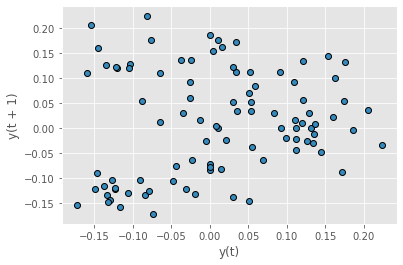

In [62]:
from pandas.plotting import lag_plot
lag_plot(df_log_diff, edgecolor='k', linewidth=1);

## <font color='green'><b>Autoregressive Integrated Moving Averages (ARIMA) :

In [158]:
from statsmodels.tsa.arima.model import ARIMA

### <font color='cyan'><b>Plotting ACF and PACF :

In [42]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

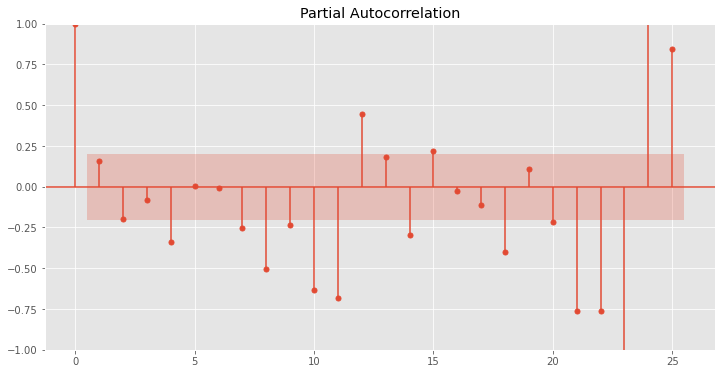

In [67]:
fig, ax = plt.subplots(figsize=(12,6))
pacf1 = plot_pacf(df_log_diff['Passengers'],lags=25,ax=ax)

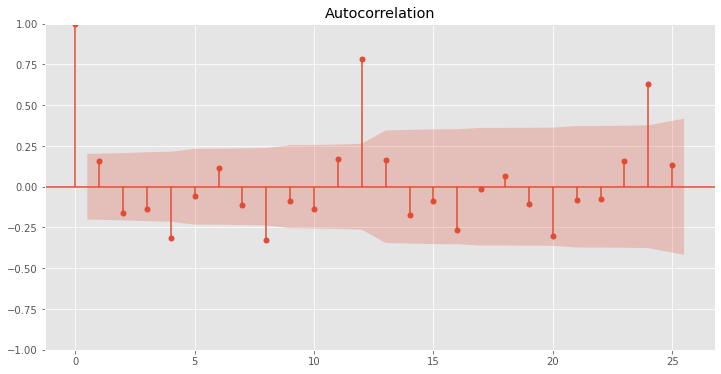

In [68]:
fig, ax = plt.subplots(figsize=(12,6))
acf1 = plot_acf(df_log_diff['Passengers'],lags=25,ax=ax)

In [24]:
lag_acf = acf(df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Partial Autocorrelation Function')

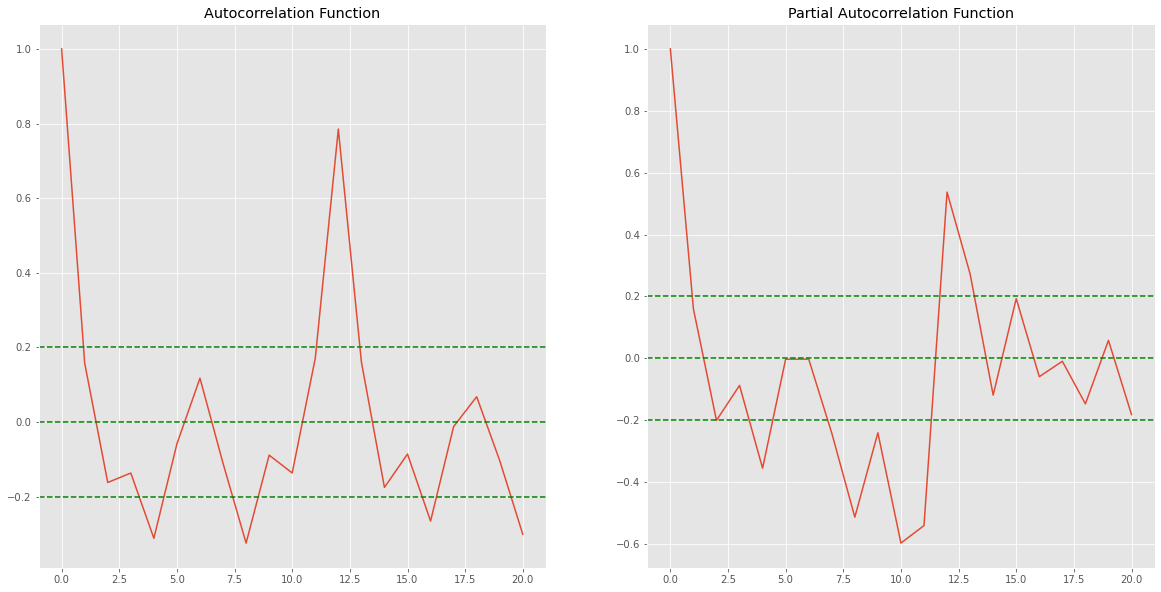

In [25]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='green')
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

<font color='maroon'><b><I>From the ACF graph, we can see that curve touches y=0.0 line at x=2. Thus q = 2. From the PACF graph, we see that curve touches y=0.0 line at x=2. Thus p = 2.

### <font color='cyan'><b>Split into train and test data with the last 2 years as test data :

In [33]:
train = df_log.iloc[:len(df)-24]
test = df_log.iloc[len(df)-24:]

In [30]:
print('Train:',train.index.min(),train.index.max(),'\n',
'Test:',test.index.min(),test.index.max())

Train: 1995-01-01 00:00:00 2000-12-01 00:00:00 
 Test: 2001-01-01 00:00:00 2002-12-01 00:00:00


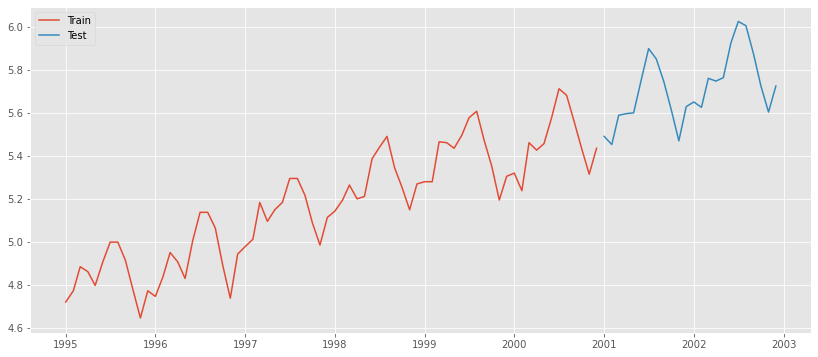

In [31]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.show()

### <font color='cyan'><b>ARIMA model :

In [34]:
model = ARIMA(train,order=(2,1,2))
model = model.fit()
model.summary()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   72
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  70.128
Date:                Wed, 21 Dec 2022   AIC                           -130.256
Time:                        00:01:24   BIC                           -118.943
Sample:                    01-01-1995   HQIC                          -125.757
                         - 12-01-2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6638      0.089     18.628      0.000       1.489       1.839
ar.L2         -0.9127      0.081    -11.228      0.000      -1.072      -0.753
ma.L1         -1.8479      0.579     -3.190      0.001      -2.983      -0.713
ma.L2          0.9848      0.627      1.571      0.116      -0.244       2.213
sigma2         0.0076      0.004      1.751      0.080      -0.001       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 3.06
Prob(Q):                              0.78   Prob(JB):                         0.22
Heteroskedasticity (H):               0.95   Skew:                             0.16
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### <font color='cyan'><b>Prediction :

In [35]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start,end=end,type='levels')
print(np.exp(pred))

2001-01-01    231.853631
2001-02-01    243.937808
2001-03-01    262.471543
2001-04-01    283.046210
2001-05-01    300.166383
2001-06-01    308.946420
2001-07-01    307.211803
2001-08-01    296.443293
2001-09-01    280.795948
2001-10-01    265.063823
2001-11-01    253.036385
2001-12-01    246.878059
2002-01-01    247.221201
2002-02-01    253.428539
2002-03-01    263.768959
2002-04-01    275.607629
2002-05-01    285.866969
2002-06-01    291.857071
2002-07-01    292.191714
2002-08-01    287.260594
2002-09-01    278.948062
2002-10-01    269.806208
2002-11-01    262.188565
2002-12-01    257.707494
Freq: MS, Name: predicted_mean, dtype: float64


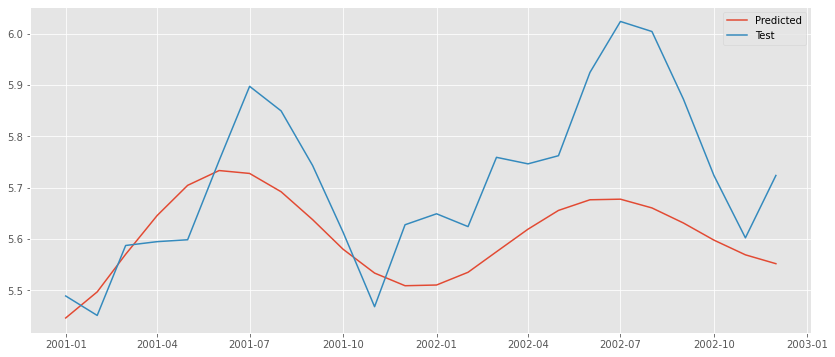

In [37]:
plt.figure(figsize=(14,6))
plt.plot(pred, label='Predicted')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.show()

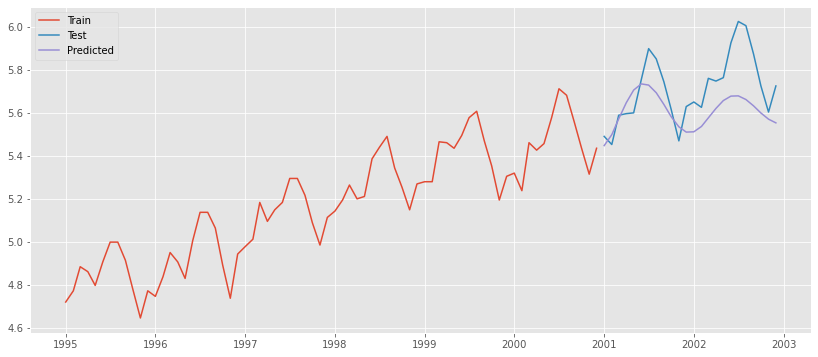

In [64]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred, label='Predicted')
plt.legend(loc='best')
plt.show()

### <font color='cyan'><b>RMSE :

In [39]:
np.exp(test.mean())

Passengers    302.429636
dtype: float64

In [107]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(np.exp(pred),np.exp(test)))

print('Root Mean Squared Error of ARIMA model =',rmse)

Root Mean Squared Error of ARIMA model = 50.550361500957855


<font color='maroon'><b>rmse value is not that low compared to the mean of data as the Arima model do not capture seasonality.

## <font color='green'><b>Seasonal Auto Regressive Integrated Moving Average (SARIMA) :

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [46]:
# Since our data is in monthly format and the seasonal period is of 1 year
df_log_seas = df_log_diff.diff(12).dropna()
df_log_seas.head()

,Passengers
Month,
1996-02-01,0.039164
1996-03-01,0.000361
1996-04-01,-0.020496
1996-05-01,-0.012939
1996-06-01,0.066148


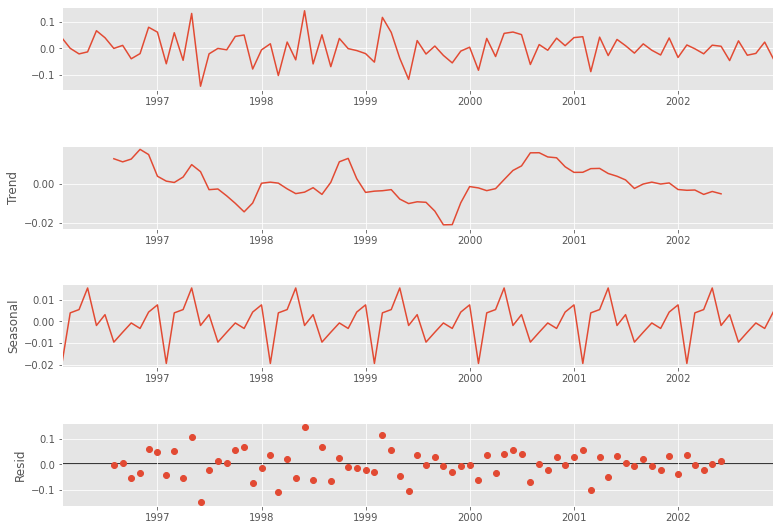

In [49]:
seas = seasonal_decompose(df_log_seas,period=12)
seas.plot()
plt.gcf().set_size_inches(12, 8);

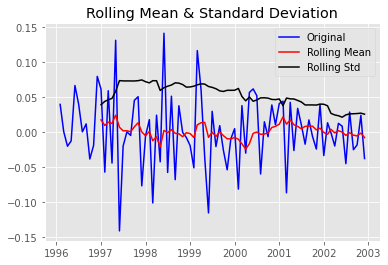

Results of Dickey Fuller Test:
Test Statistic                 -3.299796
p-value                         0.014888
#Lags Used                     11.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


In [50]:
test_stationarity(df_log_seas)

<font color='maroon'><b><I>Since pvalue is less than 0.5 and the critical values are close to test statistic the time series is stationary.

### <font color='cyan'><b>Plotting ACF and PACF :

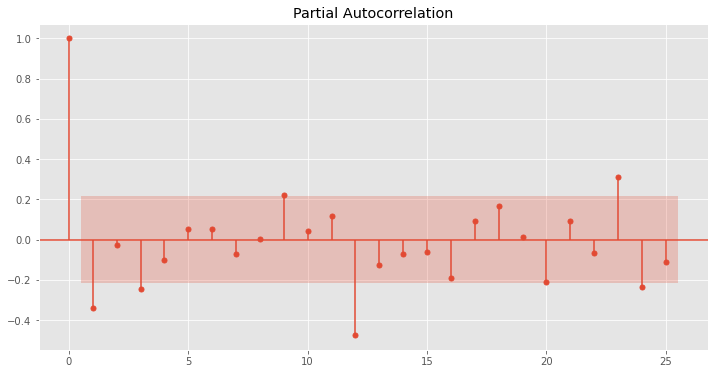

In [51]:
fig, ax = plt.subplots(figsize=(12,6))
pacf2 = plot_pacf(df_log_seas['Passengers'],lags=25,ax=ax)

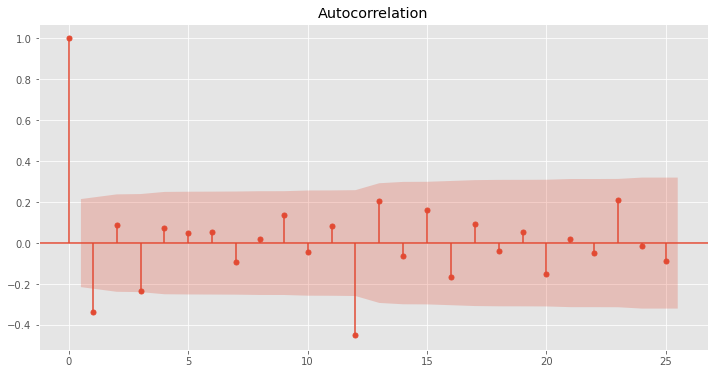

In [52]:
fig, ax = plt.subplots(figsize=(12,6))
acf2 = plot_acf(df_log_seas['Passengers'],lags=25,ax=ax)

In [53]:
lag_acf2 = acf(df_log_seas, nlags=20)
lag_pacf2 = pacf(df_log_seas, nlags=20, method='ols')

Text(0.5, 1.0, 'Partial Autocorrelation Function')

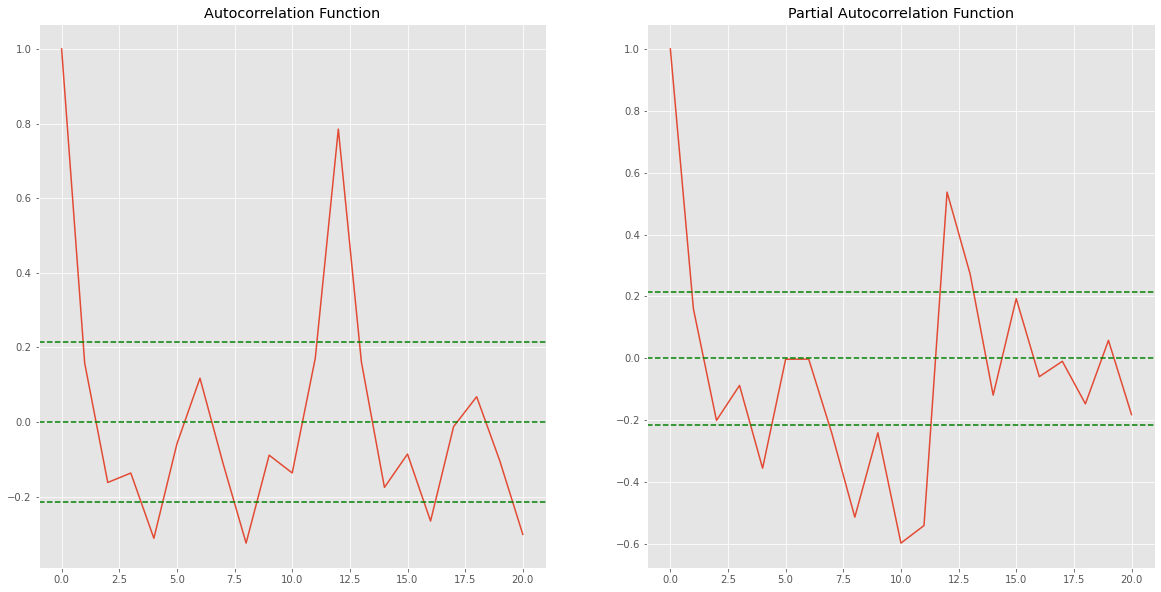

In [54]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(df_log_seas)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(df_log_seas)),linestyle='--',color='green')
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(df_log_seas)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(df_log_seas)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

<font color='maroon'><b><I>Precisely, from the above plots the seasonal components for order of AutoRegression(AR) and order of Moving Average(MA), P and Q are 1.

### <font color='cyan'><b>SARIMA model :

In [58]:
model_sr = SARIMAX(train,order=(2,1,2),seasonal_order=(1,1,1,12))
model_sr = model_sr.fit()
model_sr.summary()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Passengers   No. Observations:                   72
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                 100.006
Date:                              Wed, 21 Dec 2022   AIC                           -186.012
Time:                                      03:45:51   BIC                           -171.469
Sample:                                  01-01-1995   HQIC                          -180.335
                                       - 12-01-2000                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2202      1.165     -0.189      0.850      -2.504       2.063
ar.L2          0.3189      0.394      0.808      0.419      -0.454       1.092
ma.L1         -0.1802      1.163     -0.155      0.877      -2.459       2.099
ma.L2         -0.3871      0.615     -0.629      0.529      -1.593       0.819
ar.S.L12      -0.1705      0.389     -0.438      0.661      -0.933       0.592
ma.S.L12      -0.4925      0.460     -1.071      0.284      -1.394       0.409
sigma2         0.0018      0.000      4.243      0.000       0.001       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.03
Prob(Q):                              0.94   Prob(JB):                         0.60
Heteroskedasticity (H):               1.02   Skew:                            -0.18
Prob(H) (two-sided):                  0.97   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### <font color='cyan'><b>Prediction :

In [59]:
pred2 = model_sr.predict(start=start,end=end,type='levels')
print(np.exp(pred2))

2001-01-01    233.498662
2001-02-01    230.641075
2001-03-01    274.473812
2001-04-01    265.065459
2001-05-01    265.953930
2001-06-01    294.962204
2001-07-01    326.199526
2001-08-01    328.868574
2001-09-01    290.292925
2001-10-01    257.920516
2001-11-01    226.181896
2001-12-01    255.488696
2002-01-01    259.807656
2002-02-01    253.833809
2002-03-01    304.372549
2002-04-01    294.085380
2002-05-01    296.328368
2002-06-01    329.682883
2002-07-01    366.645426
2002-08-01    367.272768
2002-09-01    324.246610
2002-10-01    287.863493
2002-11-01    252.896311
2002-12-01    285.606979
Freq: MS, Name: predicted_mean, dtype: float64


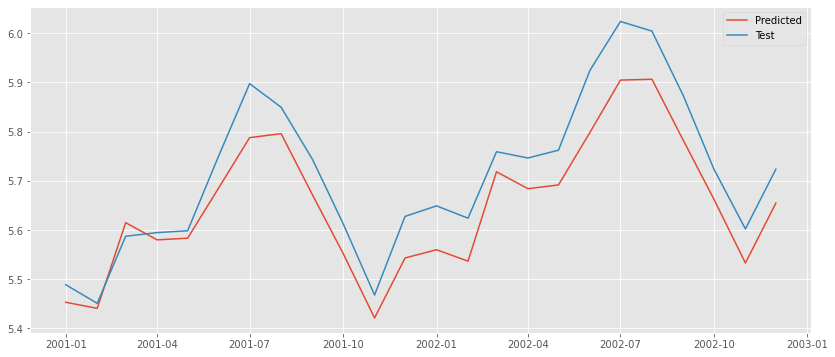

In [60]:
plt.figure(figsize=(14,6))
plt.plot(pred2, label='Predicted')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.show()

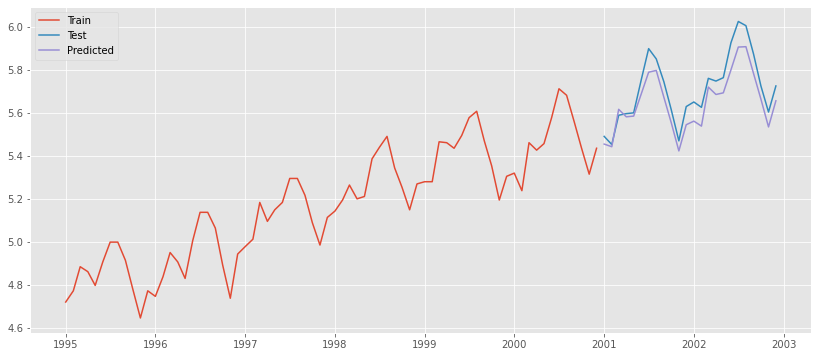

In [63]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred2, label='Predicted')
plt.legend(loc='best')
plt.show()

### <font color='cyan'><b>RMSE :

In [106]:
rmse2 = sqrt(mean_squared_error(np.exp(pred2),np.exp(test)))

print('Root Mean Squared Error of SARIMA model =',rmse2)

Root Mean Squared Error of SARIMA model = 23.577406490100447


<font color='maroon'><b><I>So the Sarima model performs better than Arima model as it captures seasonal component as well.

## <font color='green'><b>Holt-Winters Forecasting :

In [68]:
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### <font color='magenta'><b>Single Exponential Smoothing :

In [69]:
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

In [70]:
dfh = df.copy()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


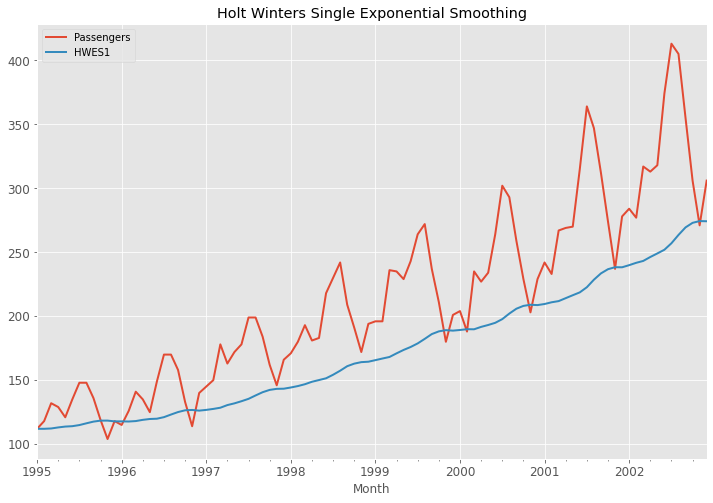

In [79]:
dfh['HWES1'] = SimpleExpSmoothing(dfh['Passengers']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
dfh[['Passengers','HWES1']]
dfh.plot(figsize=(12,8), linewidth=2, fontsize=12,title='Holt Winters Single Exponential Smoothing');

<font color='maroon'><b><I>As can be seen Single Exponential Smoothing do not capture trend and seasonality.

### <font color='magenta'><b>Double Exponential Smoothing :

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


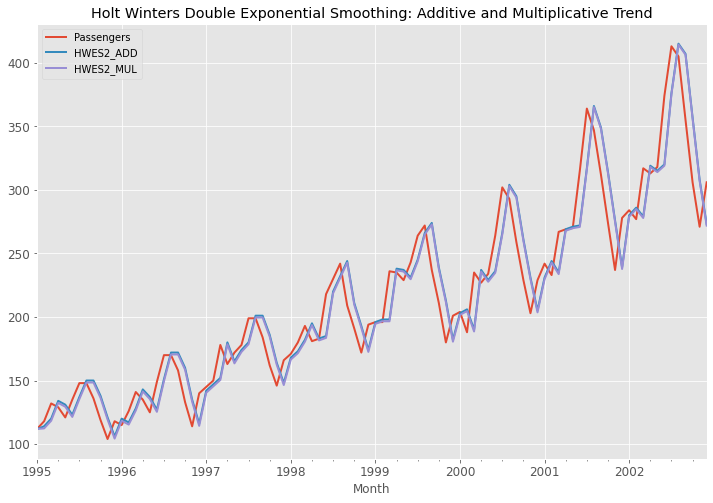

In [81]:
dfh['HWES2_ADD'] = ExponentialSmoothing(dfh['Passengers'],trend='add').fit().fittedvalues
dfh['HWES2_MUL'] = ExponentialSmoothing(dfh['Passengers'],trend='mul').fit().fittedvalues
dfh[['Passengers','HWES2_ADD','HWES2_MUL']].plot(figsize=(12,8), linewidth=2, fontsize=12,
                                                 title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

<font color='maroon'><b><I>Dounble Exponential Smoothing captures the trend but not the seasonality.

### <font color='magenta'><b>Triple Exponential Smoothing :

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


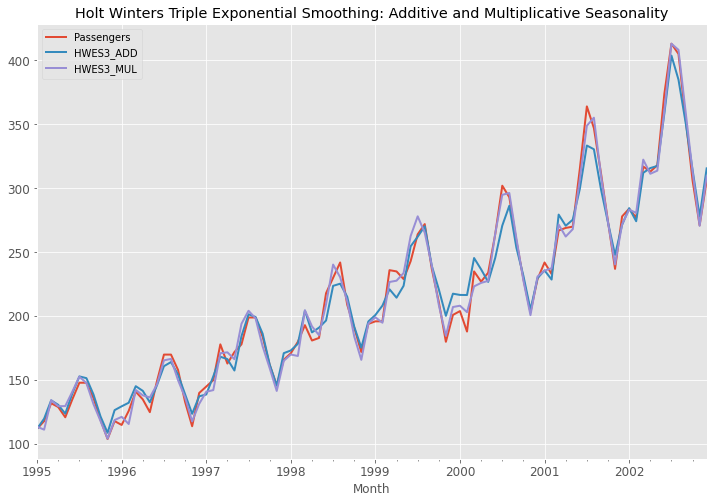

In [83]:
dfh['HWES3_ADD'] = ExponentialSmoothing(dfh['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
dfh['HWES3_MUL'] = ExponentialSmoothing(dfh['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
dfh[['Passengers','HWES3_ADD','HWES3_MUL']].plot(figsize=(12,8), linewidth=2, fontsize=12,
                                                 title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

<font color='maroon'><b><I>Triple Exponential Smoothing captures both trend and seasonality.

### <font color='cyan'><b>Split into train and test data :

In [90]:
trainh = dfh['Passengers'].iloc[:len(dfh)-24]
testh = dfh['Passengers'].iloc[len(dfh)-24:]
print('Train:',trainh.index.min(),trainh.index.max(),'\n',
'Test:',testh.index.min(),testh.index.max())

Train: 1995-01-01 00:00:00 2000-12-01 00:00:00 
 Test: 2001-01-01 00:00:00 2002-12-01 00:00:00


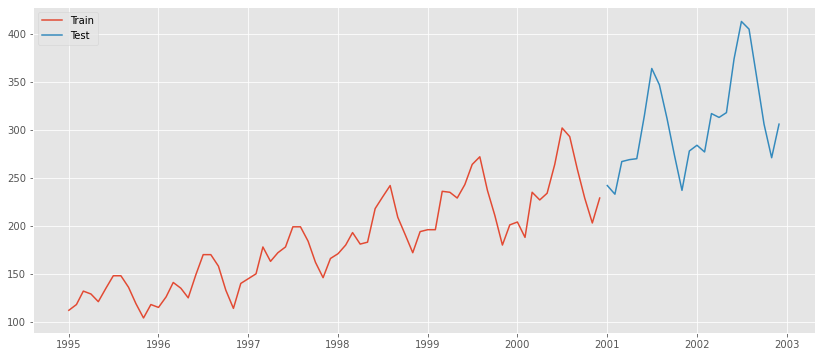

In [91]:
plt.figure(figsize=(14,6))
plt.plot(trainh, label='Train')
plt.plot(testh, label='Test')
plt.legend(loc='best')
plt.show()

### <font color='cyan'><b>TES model :

### <font color='hotpink'><b>With Multiplicative Seasonality :

In [92]:
model_h = ExponentialSmoothing(trainh,trend='mul',seasonal='mul',seasonal_periods=12)
model_h = model_h.fit()
model_h.summary()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,Passengers,No. Observations:,72
Model:,ExponentialSmoothing,SSE,2946.125
Optimized:,True,AIC,299.234
Trend:,Multiplicative,BIC,335.660
Seasonal:,Multiplicative,AICC,312.139
Seasonal Periods:,12,Date:,"Wed, 21 Dec 2022"
Box-Cox:,False,Time:,18:28:50
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6135101,alpha,True
smoothing_trend,2.4832e-13,beta,True


### <font color='cyan'><b>Prediction :

In [93]:
starth = len(trainh)
endh = len(trainh)+len(testh)-1
pred3 = model_h.predict(start=starth,end=endh)
print(pred3)

2001-01-01    233.064463
2001-02-01    234.636443
2001-03-01    274.649281
2001-04-01    264.204345
2001-05-01    263.842031
2001-06-01    293.360562
2001-07-01    324.746337
2001-08-01    327.241130
2001-09-01    290.984029
2001-10-01    257.687012
2001-11-01    226.696746
2001-12-01    257.565616
2002-01-01    261.603499
2002-02-01    263.367970
2002-03-01    308.280431
2002-04-01    296.556499
2002-05-01    296.149819
2002-06-01    329.282931
2002-07-01    364.511934
2002-08-01    367.312218
2002-09-01    326.615389
2002-10-01    289.241110
2002-11-01    254.456047
2002-12-01    289.104849
Freq: MS, dtype: float64


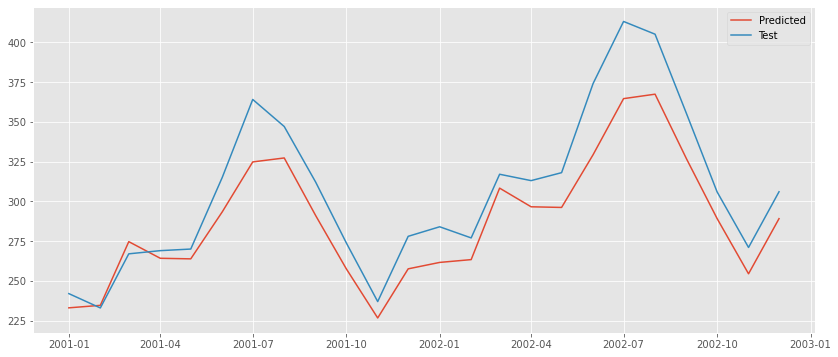

In [95]:
plt.figure(figsize=(14,6))
plt.plot(pred3, label='Predicted')
plt.plot(testh, label='Test')
plt.legend(loc='best')
plt.show()

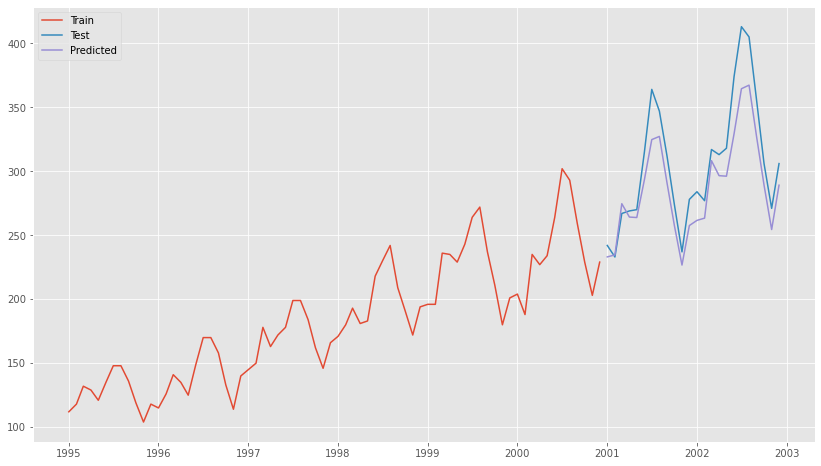

In [97]:
plt.figure(figsize=(14,8))
plt.plot(trainh, label='Train')
plt.plot(testh, label='Test')
plt.plot(pred3, label='Predicted')
plt.legend(loc='best')
plt.show()

### <font color='cyan'><b>RMSE :

In [177]:
rmse3 = sqrt(mean_squared_error(pred3,testh))
print('Root Mean Squared Error of Holt-Winters Triple Exponential Smoothing model with Multiplicative Seasonality =',rmse3)

Root Mean Squared Error of Holt-Winters Triple Exponential Smoothing model with Multiplicative Seasonality = 23.05884177641098


### <font color='hotpink'><b>With Additive Seasonality :

In [168]:
model_h1 = ExponentialSmoothing(trainh,trend='add',seasonal='add',seasonal_periods=12)
model_h1 = model_h1.fit()
model_h1.summary()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,Passengers,No. Observations:,72
Model:,ExponentialSmoothing,SSE,4466.367
Optimized:,True,AIC,329.192
Trend:,Additive,BIC,365.618
Seasonal:,Additive,AICC,342.097
Seasonal Periods:,12,Date:,"Thu, 22 Dec 2022"
Box-Cox:,False,Time:,18:29:18
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.000000,beta,True


### <font color='cyan'><b>Prediction :

In [169]:
predh = model_h1.predict(start=starth,end=endh)
print(predh)

2001-01-01    231.400334
2001-02-01    233.900141
2001-03-01    260.066622
2001-04-01    252.566655
2001-05-01    251.566464
2001-06-01    272.066436
2001-07-01    293.066559
2001-08-01    294.900096
2001-09-01    271.399984
2001-10-01    248.399976
2001-11-01    227.400162
2001-12-01    248.900273
2002-01-01    251.300607
2002-02-01    253.800415
2002-03-01    279.966896
2002-04-01    272.466928
2002-05-01    271.466737
2002-06-01    291.966710
2002-07-01    312.966832
2002-08-01    314.800370
2002-09-01    291.300257
2002-10-01    268.300250
2002-11-01    247.300435
2002-12-01    268.800547
Freq: MS, dtype: float64


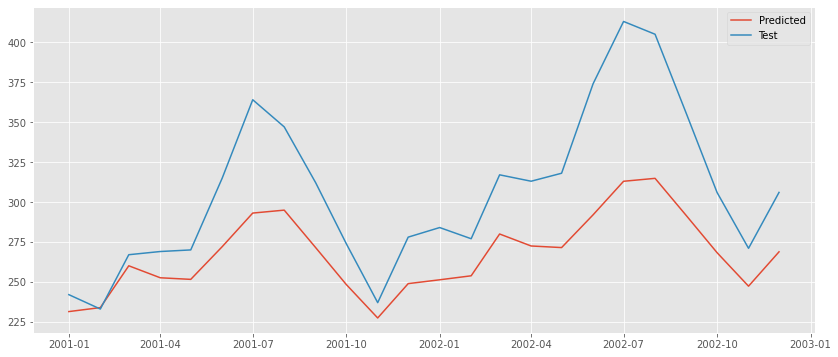

In [170]:
plt.figure(figsize=(14,6))
plt.plot(predh, label='Predicted')
plt.plot(testh, label='Test')
plt.legend(loc='best')
plt.show()

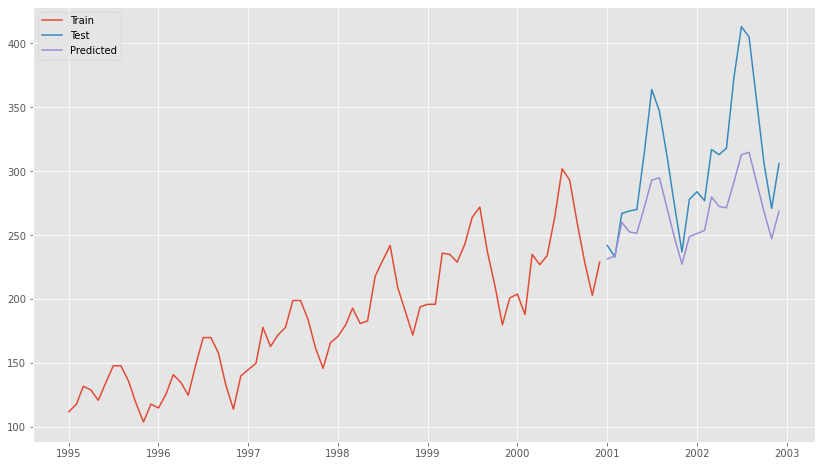

In [171]:
plt.figure(figsize=(14,8))
plt.plot(trainh, label='Train')
plt.plot(testh, label='Test')
plt.plot(predh, label='Predicted')
plt.legend(loc='best')
plt.show()

### <font color='cyan'><b>RMSE :

In [178]:
rmseh = sqrt(mean_squared_error(predh,testh))
print('Root Mean Squared Error of Holt-Winters Triple Exponential Smoothing model with Additive Seasonality =',rmseh)

Root Mean Squared Error of Holt-Winters Triple Exponential Smoothing model with Additive Seasonality = 46.853790517747804


<font color='maroon'><b><I>Holt-Winters TES multiplicative seasonality model has performed well. 

## <font color='green'><b>Forecasting with Linear Regression ML model :

In [137]:
dfm = df.copy()

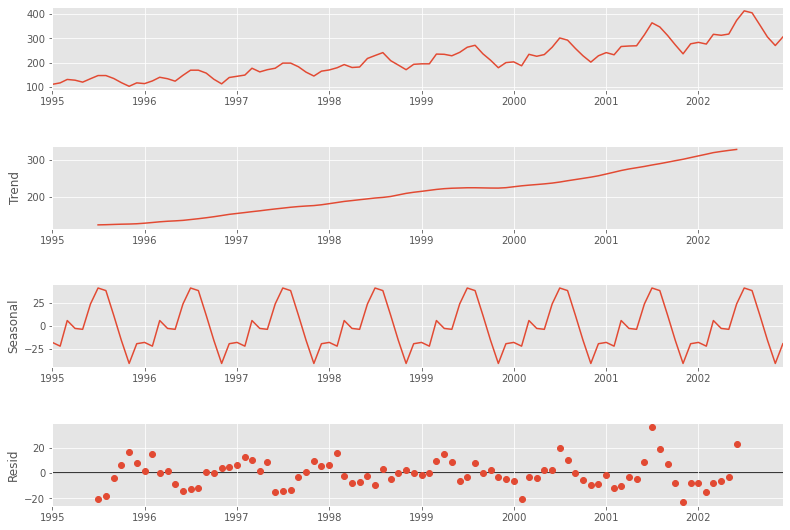

In [139]:
seas = seasonal_decompose(dfm,period=12)
seas.plot()
plt.gcf().set_size_inches(12, 8);

In [141]:
# since there is a seasonal pattern for every 12 months
dfm['psg_1'] = dfm['Passengers'].shift(+1)
dfm['psg_2'] = dfm['Passengers'].shift(+2)
dfm['psg_3'] = dfm['Passengers'].shift(+3)
dfm['psg_4'] = dfm['Passengers'].shift(+4)
dfm['psg_5'] = dfm['Passengers'].shift(+5)
dfm['psg_6'] = dfm['Passengers'].shift(+6)
dfm['psg_7'] = dfm['Passengers'].shift(+7)
dfm['psg_8'] = dfm['Passengers'].shift(+8)
dfm['psg_9'] = dfm['Passengers'].shift(+9)
dfm['psg_10'] = dfm['Passengers'].shift(+10)
dfm['psg_11'] = dfm['Passengers'].shift(+11)
dfm['psg_12'] = dfm['Passengers'].shift(+12)
dfm = dfm.dropna()
dfm.head()

,Passengers,psg_1,psg_2,psg_3,psg_4,psg_5,psg_6,psg_7,psg_8,psg_9,psg_10,psg_11,psg_12
Month,,,,,,,,,,,,,
1996-01-01,115,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0,112.0
1996-02-01,126,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0
1996-03-01,141,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0
1996-04-01,135,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0
1996-05-01,125,135.0,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0


### <font color='cyan'><b>LR model :

In [142]:
from sklearn.linear_model import LinearRegression

In [143]:
lr = LinearRegression()

In [147]:
x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y = dfm['psg_1'],dfm['psg_2'],dfm['psg_3'],dfm['psg_4'],dfm['psg_5'],dfm['psg_6'],dfm['psg_7'],dfm['psg_8'],dfm['psg_9'],dfm['psg_10'],dfm['psg_11'],dfm['psg_12'],dfm['Passengers']

In [148]:
x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y = np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(x8),np.array(x9),np.array(x10),np.array(x11),np.array(x12),np.array(y)

In [149]:
x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y =x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),x7.reshape(-1,1),x8.reshape(-1,1),x9.reshape(-1,1),x10.reshape(-1,1),x11.reshape(-1,1),x12.reshape(-1,1),y.reshape(-1,1)

In [150]:
final_x = np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12),axis=1)
print(final_x)

[[118. 104. 119. ... 132. 118. 112.]
 [115. 118. 104. ... 129. 132. 118.]
 [126. 115. 118. ... 121. 129. 132.]
 ...
 [355. 405. 413. ... 278. 237. 274.]
 [306. 355. 405. ... 284. 278. 237.]
 [271. 306. 355. ... 277. 284. 278.]]


### <font color='cyan'><b>Split into train and test data :

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
x_train,x_test,y_train,y_test = final_x[:-24],final_x[-24:],y[:-24],y[-24:]

In [153]:
lr.fit(x_train,y_train)

LinearRegression()

### <font color='cyan'><b>Prediction :

In [154]:
pred_lin =lr.predict(x_test)
pred_lin

array([[218.18268335],
       [218.93116555],
       [239.97704373],
       [254.56713382],
       [262.91212825],
       [292.46228459],
       [333.82694776],
       [334.71348569],
       [298.00805229],
       [263.44089803],
       [233.11448436],
       [249.31627035],
       [264.63302814],
       [255.26173089],
       [276.36038446],
       [296.00829676],
       [301.49030971],
       [345.2662981 ],
       [397.11722171],
       [383.90348911],
       [356.09258387],
       [300.74956443],
       [268.64421855],
       [291.68363663]])

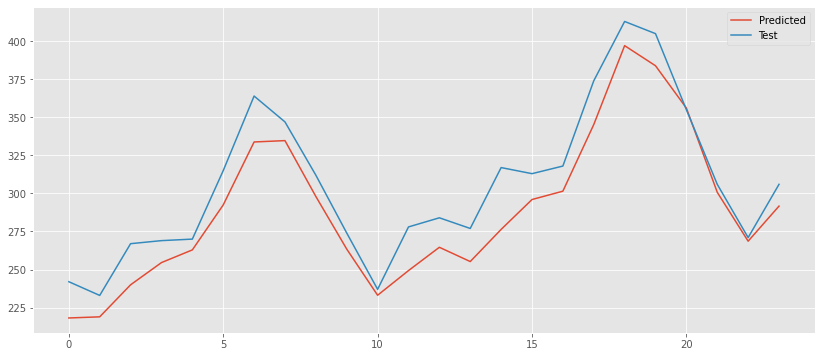

In [155]:
plt.figure(figsize=(14,6))
plt.plot(pred_lin, label='Predicted')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

### <font color='cyan'><b>RMSE :

In [157]:
rmse_lin = sqrt(mean_squared_error(pred_lin,y_test))
print('Root Mean Squared Error of Linear Regression ML model =',rmse_lin)

Root Mean Squared Error of Holt-Winters Triple Exponential Smoothing model = 19.675644109274824


<font color='maroon'><b><I>So linear regression model has got lesser rmse value compared to other models.

## <font color='green'><b>Forecasting with LSTM Recurrent Neural Network :

<font color='green'>As Long Short-Term Memory(LSTM) has feedback connections it is for time series prediction.

In [108]:
dfl = df.copy()
trainl = dfl.iloc[:len(dfl)-24]
testl = dfl.iloc[len(dfl)-24:]
print('Train:',trainl.index.min(),trainl.index.max(),'\n',
'Test:',testl.index.min(),testl.index.max())

Train: 1995-01-01 00:00:00 2000-12-01 00:00:00 
 Test: 2001-01-01 00:00:00 2002-12-01 00:00:00


In [109]:
from sklearn.preprocessing import MinMaxScaler

In [110]:
scaler = MinMaxScaler()

In [111]:
scaler.fit(trainl)
scaled_train = scaler.transform(trainl)
scaled_test = scaler.transform(testl)

In [112]:
scaled_train[:10]

array([[0.04040404],
       [0.07070707],
       [0.14141414],
       [0.12626263],
       [0.08585859],
       [0.15656566],
       [0.22222222],
       [0.22222222],
       [0.16161616],
       [0.07575758]])

### <font color='cyan'><b>LSTM model :

In [113]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [114]:
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [115]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [116]:
model_n = Sequential()
model_n.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model_n.add(Dense(1))
model_n.compile(optimizer='adam',loss='mse')

In [117]:
model_n.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [118]:
model_n.fit(generator,epochs=50)

Epoch 1/50
60/60 [==============================] - 6s 9ms/step - loss: 0.0585
Epoch 2/50
60/60 [==============================] - 1s 8ms/step - loss: 0.0240
Epoch 3/50
60/60 [==============================] - 1s 8ms/step - loss: 0.0207
Epoch 4/50
60/60 [==============================] - 1s 8ms/step - loss: 0.0192
Epoch 5/50
60/60 [==============================] - 1s 8ms/step - loss: 0.0186
Epoch 6/50
60/60 [==============================] - 1s 8ms/step - loss: 0.0181
Epoch 7/50
60/60 [==============================] - 1s 8ms/step - loss: 0.0215
Epoch 8/50
60/60 [==============================] - 1s 8ms/step - loss: 0.0237
Epoch 9/50
60/60 [==============================] - 1s 9ms/step - loss: 0.0161
Epoch 10/50
60/60 [==============================] - 1s 8ms/step - loss: 0.0182
Epoch 11/50
60/60 [==============================] - 1s 8ms/step - loss: 0.0143
Epoch 12/50
60/60 [==============================] - 1s 8ms/step - loss: 0.0124
Epoch 13/50
60/60 [==============================

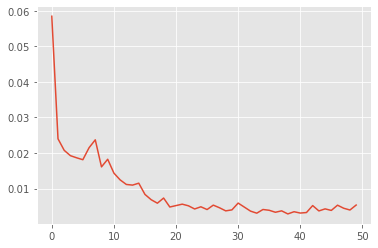

In [119]:
loss_per_epoch = model_n.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch);

In [120]:
last_train_batch = scaled_train[-12:]

In [121]:
last_train_batch = last_train_batch.reshape((1,n_input,n_features))

In [122]:
model_n.predict(last_train_batch)

1/1 [==============================] - 0s 469ms/step


array([[0.58991706]], dtype=float32)

In [123]:
scaled_test[0]

array([0.6969697])

In [124]:
test_predictions =[]

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
    current_pred = model_n.predict(current_batch)[0]   #prediction for first batch
    test_predictions.append(current_pred)    #appending the prediction into the array
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)  #update the batch n remove the first value

1/1 [==============================] - 0s 31ms/step


In [125]:
test_predictions

[array([0.58991706], dtype=float32),
 array([0.6169653], dtype=float32),
 array([0.6745265], dtype=float32),
 array([0.7134724], dtype=float32),
 array([0.80651414], dtype=float32),
 array([0.94407636], dtype=float32),
 array([1.0534365], dtype=float32),
 array([1.0548714], dtype=float32),
 array([0.9458179], dtype=float32),
 array([0.77036464], dtype=float32),
 array([0.701286], dtype=float32),
 array([0.67890215], dtype=float32),
 array([0.6536021], dtype=float32),
 array([0.6642666], dtype=float32),
 array([0.69402367], dtype=float32),
 array([0.7497545], dtype=float32),
 array([0.84421414], dtype=float32),
 array([0.96772593], dtype=float32),
 array([1.0703313], dtype=float32),
 array([1.1070274], dtype=float32),
 array([1.0423913], dtype=float32),
 array([0.9254031], dtype=float32),
 array([0.8291287], dtype=float32),
 array([0.75180715], dtype=float32)]

In [126]:
true_predictions = scaler.inverse_transform(test_predictions)

In [127]:
testl['Predictions'] = true_predictions

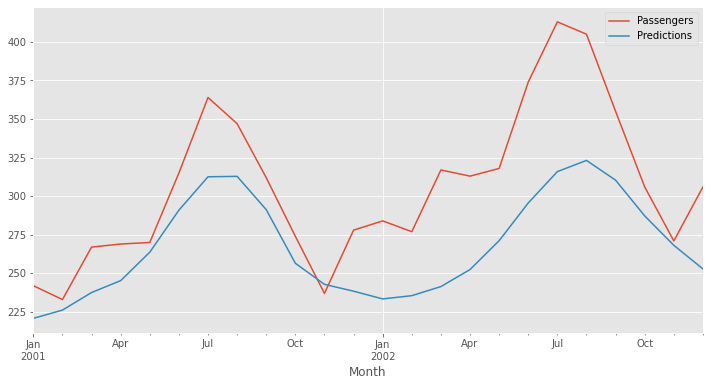

In [129]:
testl.plot(figsize=(12,6));

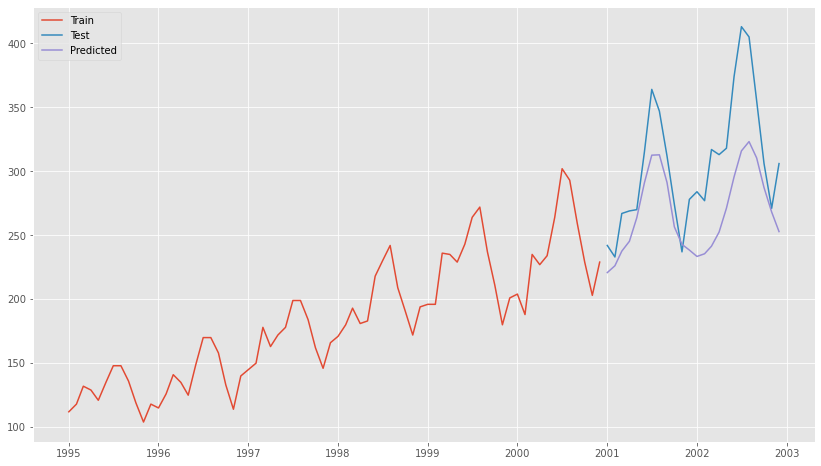

In [136]:
plt.figure(figsize=(14,8))
plt.plot(trainl, label='Train')
plt.plot(testl['Passengers'], label='Test')
plt.plot(testl['Predictions'], label='Predicted')
plt.legend(loc='best')
plt.show()

### <font color='cyan'><b>RMSE :

In [132]:
rmse_n = sqrt(mean_squared_error(testl['Passengers'],testl['Predictions']))
print(rmse_n)

46.53770152653327


### <font color='brown'><b>Comparision of Models :

In [175]:
data = {'Models':['ARIMA','SARIMA','Holt-Winters Triple Exponential Smoothing with Multiplicative Seasonality',
                  'Holt-Winters Triple Exponential Smoothing with Additive Seasonality',
                  'Linear Regression','LSTM Recurrent Neural Network'],
       'Root Mean Squared Error':[rmse,rmse2,rmse3,rmseh,rmse_lin,rmse_n]}
Models = pd.DataFrame(data)
Models = Models.sort_values('Root Mean Squared Error').reset_index(drop=True)
Models

,Models,Root Mean Squared Error
0,Linear Regression,19.675644
1,Holt-Winters Triple Exponential Smoothing with...,23.058842
2,SARIMA,23.577406
3,LSTM Recurrent Neural Network,46.537702
4,Holt-Winters Triple Exponential Smoothing with...,46.853791
5,ARIMA,50.550362


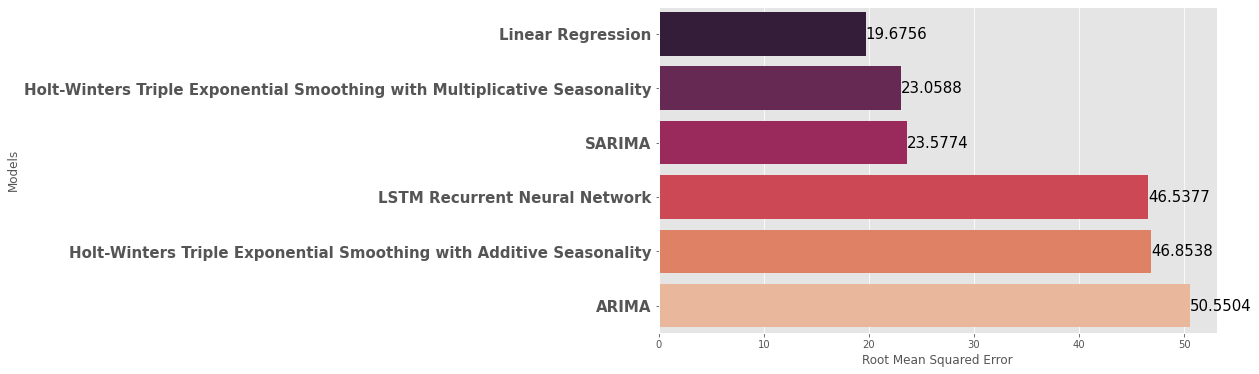

In [176]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=Models,x='Root Mean Squared Error',y='Models',palette='rocket',ci=None)
plt.yticks(fontsize=15,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=15)

<font color='maroon'><b><I>Holt-Winters Triple Exponential Smoothing with Multiplicative Seasonality is the simplest and has given the best results.

## <font color='peach'><b>Ordinary Least Square Models :

### <font color='orange'><b><I>Creating Dummy Variables of the Categorical Feature Month of Date Time feature :

In [192]:
air = df.copy()
air.reset_index(inplace=True)
air['t'] = np.arange(1,len(air)+1)
air['t_squared'] = np.square(air.t)
air["month"] = air.Month.dt.strftime("%b") # month extraction
air["year"] = air.Month.dt.strftime("%Y") # year extraction
months = pd.get_dummies(air['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
airlines = pd.concat([air,months],axis=1)
airlines['log_psg'] = np.log(airlines['Passengers'])
airlines

,Month,Passengers,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_psg
0,1995-01-01,112,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-01,132,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-01,129,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-01,121,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
92,2002-09-01,355,93,8649,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
93,2002-10-01,306,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.723585
94,2002-11-01,271,95,9025,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0,5.602119


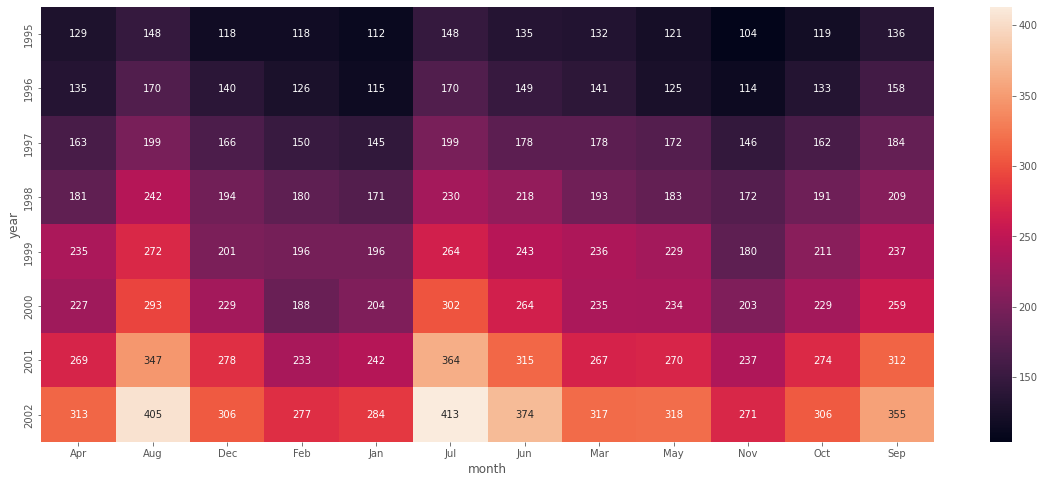

In [186]:
plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g");

### <font color='orange'><b><I>Split into train and test data :

In [194]:
size = 72

train_data = airlines.iloc[:size]
test_data = airlines.iloc[size:]

### <font color='hotpink'><b>Linear Model :

In [190]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_linear))**2))
rmse_linear

51.6677929956463

In [191]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     217.9
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           3.50e-23
Time:                        06:17:23   Log-Likelihood:                -329.04
No. Observations:                  72   AIC:                             662.1
Df Residuals:                      70   BIC:                             666.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    110.5243      5.643     19.586      0.000      99.270     121.779
t              1.9830      0.134     14.760      0.000       1.715       2.251
==============================================================================
Omnibus:                        0.634   Durbin-Watson:                   0.659
Prob(Omnibus):                  0.728   Jarque-Bera (JB):                0.667
Skew:                           0.213   Prob(JB):                        0.717
Kurtosis:                       2.799   Cond. No.                         84.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color='hotpink'><b>Exponential Model :

In [195]:
Exp = smf.ols('log_psg~t',data=train_data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test_data['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

42.55232894600458

In [196]:
Exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_psg   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     246.3
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           1.28e-24
Time:                        06:20:35   Log-Likelihood:                 48.708
No. Observations:                  72   AIC:                            -93.42
Df Residuals:                      70   BIC:                            -88.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7699      0.030    160.519      0.000       4.711       4.829
t              0.0111      0.001     15.693      0.000       0.010       0.013
==============================================================================
Omnibus:                        2.000   Durbin-Watson:                   0.687
Prob(Omnibus):                  0.368   Jarque-Bera (JB):                1.573
Skew:                          -0.186   Prob(JB):                        0.456
Kurtosis:                       2.378   Cond. No.                         84.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color='hotpink'><b>Quadratic Model :

In [197]:
Quad = smf.ols('Passengers~t+t_squared',data=train_data).fit()
pred_Quad = pd.Series(Quad.predict(test_data[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

51.990736401554834

In [198]:
Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     107.4
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           6.52e-22
Time:                        06:23:04   Log-Likelihood:                -329.04
No. Observations:                  72   AIC:                             664.1
Df Residuals:                      69   BIC:                             670.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    110.2764      8.677     12.710      0.000      92.967     127.586
t              2.0031      0.549      3.652      0.001       0.909       3.097
t_squared     -0.0003      0.007     -0.038      0.970      -0.015       0.014
==============================================================================
Omnibus:                        0.649   Durbin-Watson:                   0.659
Prob(Omnibus):                  0.723   Jarque-Bera (JB):                0.679
Skew:                           0.216   Prob(JB):                        0.712
Kurtosis:                       2.799   Cond. No.                     7.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### <font color='hotpink'><b>Additive Seasonality Model :

In [200]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

127.26451565320338

In [201]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     1.379
Date:                Fri, 23 Dec 2022   Prob (F-statistic):              0.206
Time:                        06:25:33   Log-Likelihood:                -371.83
No. Observations:                  72   AIC:                             767.7
Df Residuals:                      60   BIC:                             795.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    168.8333      5.044     33.475      0.000     158.745     178.922
Jan          -11.6667     18.126     -0.644      0.522     -47.925      24.591
Feb           -9.1667     18.126     -0.506      0.615     -45.425      27.091
Mar           17.0000     18.126      0.938      0.352     -19.258      53.258
Apr            9.5000     18.126      0.524      0.602     -26.758      45.758
May            8.5000     18.126      0.469      0.641     -27.758      44.758
Jun           29.0000     18.126      1.600      0.115      -7.258      65.258
Jul           50.0000     18.126      2.758      0.008      13.742      86.258
Aug           51.8333     18.126      2.860      0.006      15.575      88.091
Sep           28.3333     18.126      1.563      0.123      -7.925      64.591
Oct            5.3333     18.126      0.294      0.770     -30.925      41.591
Nov          -15.6667     18.126     -0.864      0.391     -51.925      20.591
Dec            5.8333     18.126      0.322      0.749     -30.425      42.091
==============================================================================
Omnibus:                       29.671   Durbin-Watson:                   0.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.962
Skew:                           0.033   Prob(JB):                       0.0837
Kurtosis:                       1.716   Cond. No.                     1.61e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.99e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### <font color='hotpink'><b>Quadratic with Additive Seasonality Model :

In [203]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

35.24160848593321

In [204]:
add_sea_Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     101.2
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           7.45e-35
Time:                        06:30:08   Log-Likelihood:                -266.00
No. Observations:                  72   AIC:                             560.0
Df Residuals:                      58   BIC:                             591.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    101.8335      3.657     27.847      0.000      94.513     109.154
t              1.9472      0.250      7.802      0.000       1.448       2.447
t_squared      0.0009      0.003      0.259      0.797      -0.006       0.007
Jan           -6.2122      4.246     -1.463      0.149     -14.712       2.287
Feb           -5.7134      4.246     -1.346      0.184     -14.212       2.785
Mar           18.4504      4.246      4.345      0.000       9.951      26.949
Apr            8.9458      4.247      2.106      0.039       0.445      17.447
May            5.9395      4.248      1.398      0.167      -2.564      14.444
Jun           24.4315      4.250      5.748      0.000      15.923      32.940
Jul           43.4218      4.253     10.210      0.000      34.909      51.935
Aug           43.2437      4.256     10.161      0.000      34.724      51.763
Sep           17.7306      4.260      4.162      0.000       9.204      26.257
Oct           -7.2843      4.264     -1.708      0.093     -15.819       1.251
Nov          -30.3009      4.269     -7.098      0.000     -38.846     -21.756
Dec          -10.8192      4.274     -2.531      0.014     -19.375      -2.263
==============================================================================
Omnibus:                        1.717   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                1.039
Skew:                          -0.185   Prob(JB):                        0.595
Kurtosis:                       3.458   Cond. No.                     4.50e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.98e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### <font color='hotpink'><b>Multiplicative Seasonality Model :

In [205]:
Mul_sea = smf.ols('log_psg~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test_data))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

132.18762800263437

In [206]:
Mul_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_psg   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.268
Date:                Fri, 23 Dec 2022   Prob (F-statistic):              0.265
Time:                        06:32:41   Log-Likelihood:                 1.9383
No. Observations:                  72   AIC:                             20.12
Df Residuals:                      60   BIC:                             47.44
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7771      0.028    170.187      0.000       4.721       4.833
Jan            0.2526      0.101      2.504      0.015       0.051       0.454
Feb            0.2771      0.101      2.747      0.008       0.075       0.479
Mar            0.4229      0.101      4.192      0.000       0.221       0.625
Apr            0.3799      0.101      3.766      0.000       0.178       0.582
May            0.3680      0.101      3.648      0.001       0.166       0.570
Jun            0.4804      0.101      4.762      0.000       0.279       0.682
Jul            0.5814      0.101      5.763      0.000       0.380       0.783
Aug            0.5898      0.101      5.847      0.000       0.388       0.792
Sep            0.4825      0.101      4.783      0.000       0.281       0.684
Oct            0.3554      0.101      3.523      0.001       0.154       0.557
Nov            0.2259      0.101      2.239      0.029       0.024       0.428
Dec            0.3611      0.101      3.580      0.001       0.159       0.563
==============================================================================
Omnibus:                       56.848   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.403
Skew:                          -0.180   Prob(JB):                       0.0407
Kurtosis:                       1.584   Cond. No.                     1.61e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.99e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### <font color='hotpink'><b>Multiplicative Seasonality and Additive Trend Model :

In [208]:
Mul_Add_sea = smf.ols('log_psg~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test_data))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.714670246780539

In [209]:
Mul_Add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_psg   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     149.0
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           1.95e-39
Time:                        06:36:55   Log-Likelihood:                 118.39
No. Observations:                  72   AIC:                            -210.8
Df Residuals:                      59   BIC:                            -181.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3975      0.011    383.337      0.000       4.375       4.420
t              0.0113      0.000     37.943      0.000       0.011       0.012
Jan            0.2829      0.020     14.007      0.000       0.243       0.323
Feb            0.2962      0.020     14.669      0.000       0.256       0.337
Mar            0.4306      0.020     21.334      0.000       0.390       0.471
Apr            0.3765      0.020     18.650      0.000       0.336       0.417
May            0.3532      0.020     17.497      0.000       0.313       0.394
Jun            0.4544      0.020     22.497      0.000       0.414       0.495
Jul            0.5441      0.020     26.926      0.000       0.504       0.585
Aug            0.5413      0.020     26.763      0.000       0.501       0.582
Sep            0.4227      0.020     20.879      0.000       0.382       0.463
Oct            0.2844      0.020     14.028      0.000       0.244       0.325
Nov            0.1436      0.020      7.073      0.000       0.103       0.184
Dec            0.2676      0.020     13.157      0.000       0.227       0.308
==============================================================================
Omnibus:                        4.430   Durbin-Watson:                   0.630
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                3.600
Skew:                          -0.438   Prob(JB):                        0.165
Kurtosis:                       3.658   Cond. No.                     6.08e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.43e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### <font color='brown'><b>Comparison of OLS Models :

In [210]:
# compare the RMSE of all the models in a dataframe
rmse_df = pd.DataFrame({'Model': ['Linear', 
                                    'Exponential', 
                                    'Quadratic', 
                                    'Additive Seasonality', 
                                    'Quadratic with Additive Seasonality', 
                                    'Multiplicative seasonality', 
                                    'Multiplicative seasonality & additive trend'], 
                        'RMSE': [rmse_linear, 
                                rmse_Exp, 
                                rmse_Quad, 
                                rmse_add_sea, 
                                rmse_add_sea_quad, 
                                rmse_Mult_sea, 
                                rmse_Mult_add_sea]})
rmse_df = rmse_df.sort_values(by='RMSE').reset_index(drop=True)
rmse_df

,Model,RMSE
0,Multiplicative seasonality & additive trend,11.714670
1,Quadratic with Additive Seasonality,35.241608
2,Exponential,42.552329
3,Linear,51.667793
4,Quadratic,51.990736
5,Additive Seasonality,127.264516
6,Multiplicative seasonality,132.187628


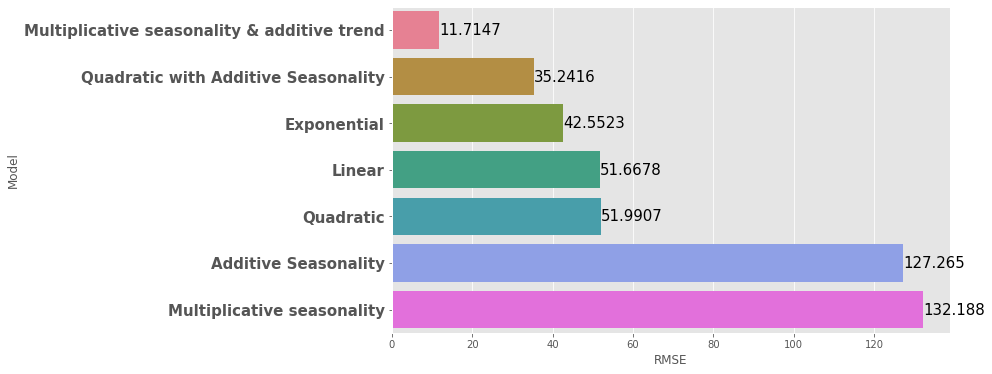

In [212]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=rmse_df,x='RMSE',y='Model',palette='husl',ci=None)
plt.yticks(fontsize=15,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=15)

## <font color='blue'><b>Comparison of all Models :

In [218]:
data1 = {'Models':['ARIMA','SARIMA','Holt-Winters Triple Exponential Smoothing with Multiplicative Seasonality',
                   'Holt-Winters Triple Exponential Smoothing with Additive Seasonality',
                   'Linear Regression','LSTM Recurrent Neural Network','Linear','Exponential',
                   'Quadratic','Additive Seasonality','Quadratic with Additive Seasonality','Multiplicative seasonality',
                   'Multiplicative seasonality & additive trend'],
       'Root Mean Squared Error':[rmse,rmse2,rmse3,rmseh,rmse_lin,rmse_n,rmse_linear,rmse_Exp,rmse_Quad,
                                  rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea]}
Model = pd.DataFrame(data1)
Model = Model.sort_values('Root Mean Squared Error').reset_index(drop=True)
Model

,Models,Root Mean Squared Error
0,Multiplicative seasonality & additive trend,11.714670
1,Linear Regression,19.675644
2,Holt-Winters Triple Exponential Smoothing with...,23.058842
3,SARIMA,23.577406
4,Quadratic with Additive Seasonality,35.241608
5,Exponential,42.552329
6,LSTM Recurrent Neural Network,46.537702
7,Holt-Winters Triple Exponential Smoothing with...,46.853791
8,ARIMA,50.550362
9,Linear,51.667793


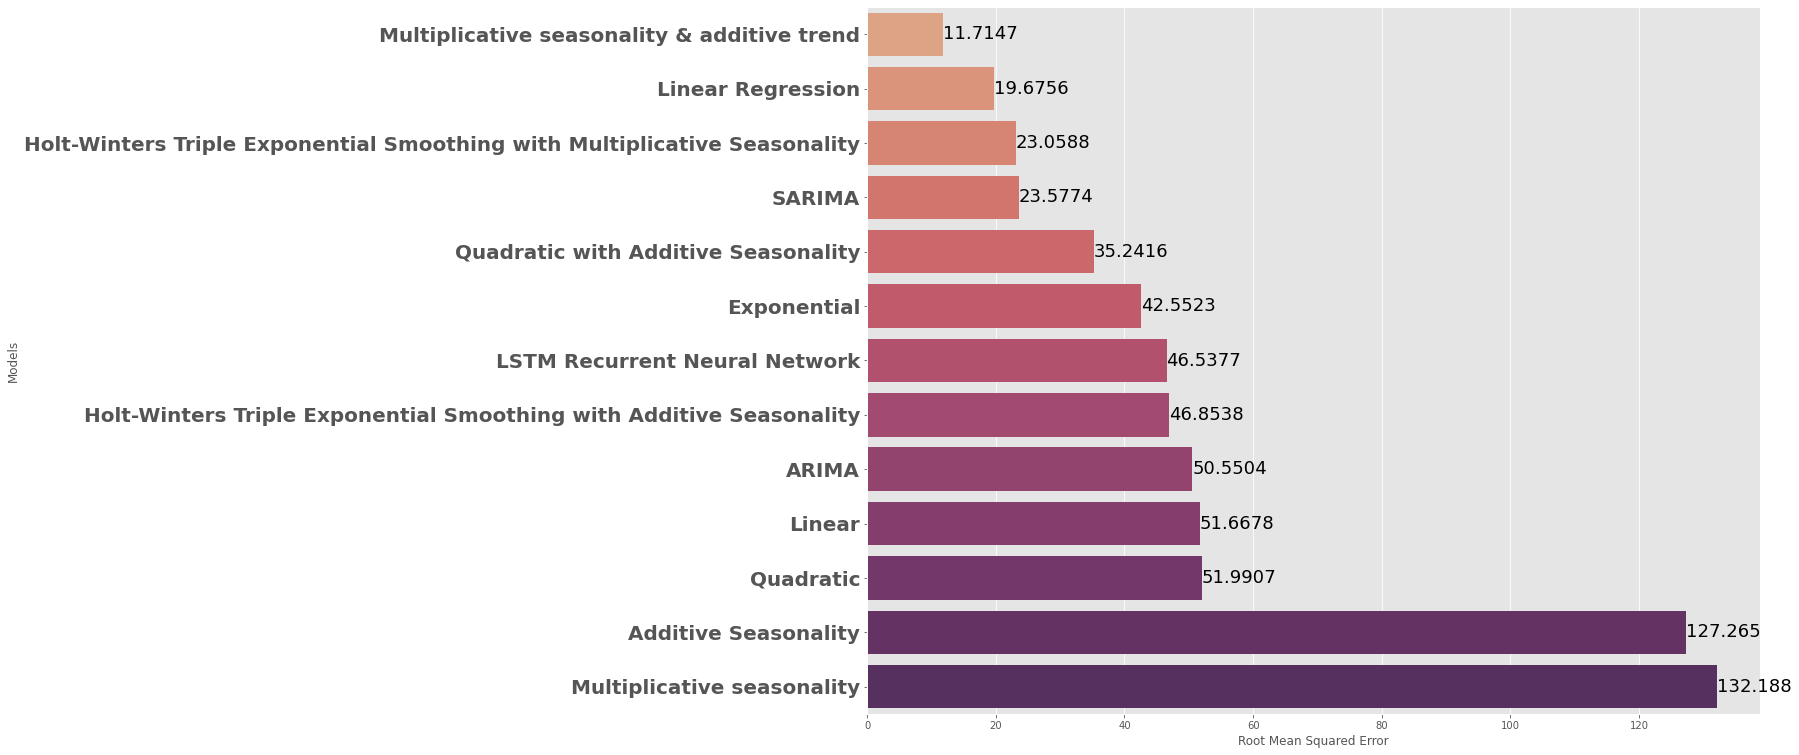

In [222]:
plt.figure(figsize=(16,13))
ax = sns.barplot(data=Model,x='Root Mean Squared Error',y='Models',palette='flare',ci=None)
plt.yticks(fontsize=20,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

<font color='maroon'><b><I>Multiplicative Seasonality and Additive Trend OLS model has the lowest RMSE compared to other models listed here.